In [120]:
txt = open('F:/资源/CSCMNews/科技/481652.txt',encoding='utf-8').read() #读取文件

In [121]:
from nltk import *
from matplotlib import pyplot as plt
import re,jieba,matplotlib
#正则清洗多余换行空格
txt=re.sub('\t|\n|\s|\r',' ',txt)
txt=re.sub('\s+',' ',txt)

In [122]:
def get_stop_words(path=r'./NLPIR_stopwords.txt'): #导入停用词
    file = open(path,'r',encoding='utf-8').read().split('\n')
    return set(file)

In [123]:
def cut(txt,stop_words):#分词并去除停用词
    word_list = []
    if txt != "" and txt is not None:
        seg_list = jieba.cut(txt, cut_all=False) #默认模式
        for word in seg_list:
            if word not in stop_words:
                word_list.append(word)
    return word_list

In [124]:
word=cut(txt,get_stop_words())

In [125]:
fdist=FreqDist(word)
print(fdist.keys(),fdist.values())#词频

dict_keys(['普天', '称', '研发', 'TD', '无线', '城市', '方案', '新浪', '科技', '讯', '月', '日', '消息', '国内', '火热', '建设', '国产', '系统', '设备', '商', '中国', '相关', '部门', '透露', '投入', '广泛应用', '政府', '办公', '学校', '教学', '城市交通', '场合', '指挥', '调度', '解决方案', '数据', '采集', '我国', '技术', '正', '打造', '十大', '示范', '指以', '信息化', '基础', '通讯', '网络', 'SCDMA', 'EDGE', '整合', '政务', '产业', '生活', '信息', '资源', '手机', '客户端', 'WAP', '网站', '形式', '各行各业', '民生', '行业', '三方', '需求', '市民', '提供', '全方位', '服务', '中国移动', '搭建', '公共信息', '平台', '普及', '扶持', '开发', '伙伴', '加速', '树立', '标杆', '地方', '加紧', '城市布局', '去年', '厦门市', '建成', '第一个', '武汉', '布局', '江汉', '高效', '人士', '看好', '市场', '作用', '2G', '时代', '梦想', '无线通信', '速度', '带宽', '3G', '高速', '传输速率', '强大', 'QOS', '保障', '轻松', '电子商务', '革命性', '推动', '出炉', '有没有', '这是', '关键', '拓展', '构建', '集成', '可视化', '视频会议', '视频', '监控', '紧急', '预案', '一体', '音视频', '远程', '业务', '统一', '管理', '资源共享', '协同作战', '报警', '多层次', '收集', '决策', '同步', '突发事件', '智能', '综合', '规则', '指令', '现场', '快速', '初步', '给出', '建议', '提高', '时效', '质量', '依托', '层级', '化', '能力', '协同', '政府部门', '社会', '

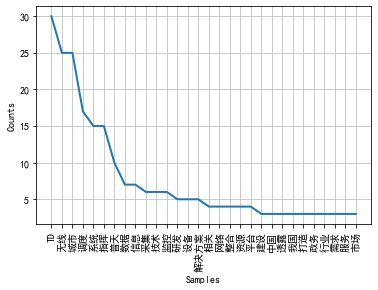

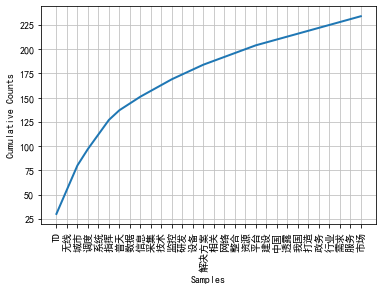

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [126]:
matplotlib.rcParams['font.sans-serif'] = 'SimHei' #nltk画图调用的是matplotlib中的plot 设置中文显示
fdist.plot(30)#频率分布图
fdist.plot(30,cumulative=True)#频率累计图

In [127]:
print(fdist.tabulate(10))#频率分布表

TD 无线 城市 调度 系统 指挥 普天 数据 信息 采集 
30 25 25 17 15 15 10  7  7  6 
None


In [128]:
#自定义去高低频词
def freqword(fdist,mincount,maxcount):
    word_list=[]
    for key in fdist.keys():
        if fdist.get(key)>mincount and fdist.get(key)<maxcount:
            word_list.append(key+':'+str(fdist.get(key)))
    return word_list
print(freqword(fdist,2,15))

['普天:10', '研发:5', '建设:3', '设备:5', '中国:3', '相关:4', '透露:3', '解决方案:5', '数据:7', '采集:6', '我国:3', '技术:6', '打造:3', '网络:4', '整合:4', '政务:3', '信息:7', '资源:4', '行业:3', '需求:3', '服务:3', '平台:4', '市场:3', '构建:3', '视频会议:3', '监控:6', '音视频:3', '业务:3', '管理:3', '决策:3', '应急:3', '传输:3', '采用:3', '承载:3', '油田:3']
